# <center> Trabajo 3.
Nombre: Juan Licanqueo

El trabajo 3 consiste en usar disponibles de vino de la clase 2:

Los datos los puede bajar desde: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data. 

Recuerde que tienen clase de acuerdo al tipo de vino en la columna 0.
1. Defina un conjunto de prueba y uno de test. Recuerde que si hay diferentes clases debe hacer muestreo estratificado para tener ejemplos de cada clase.
2. Aplique el SVM  con regularización para ver su clasificación.
3. Aplique SVM con kernel de base radial y regularización.
4. ¿Cúal modelo logró mejor clasificación?

### Importamos las librerias .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
import tensorflow as tf
import keras

### Definimos el directorio de trabajo.

In [2]:
os.chdir('/Users/Juan/Desktop/ciencia_datos02/')
os.getcwd()

'C:\\Users\\Juan\\Desktop\\ciencia_datos02'

### Cargaremos  los datos de las propiedades del Vino desde UCI machine learning repository con el siguiente código y visualizaremos su dimensión.

In [3]:
#Crearemos una variable para guardar el dataset de VINOS sin encabezados.
Vinos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                    header=None)
#-----------------------------------------------------------------------------------------------
#A continuación agregaremos los encabezados, los nombres de las variables por columna.
Vinos.columns = ['Etiqueta_Clase',
                 'Alcohol',
                 'Acido_Malico',
                 'Ceniza',
                 'Alcalinidad_Cenizas', 
                 'Magnesio', 
                 'Fenoles_Totales',
                 'Flavonoides',
                 'Fenoles_No_Flavonoides', 
                 'Proantocianinas',
                 'Intensidad_Color', 
                 'Tono',
                 'OD280/OD315_Vinos_Diluidos',
                 'Prolina']
#--------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la dimensión de los dataset.
Vinos.shape

(178, 14)

### Observaremos como se comportan los datos aplicando un resumen estadístico, de esta forma podremos las diferencias de la magnitud de rango de las diferentes variables.

In [4]:
#Aplicaremos la función describe para generar el resumen estadístico.
Vinos.describe()

,Etiqueta_Clase,Alcohol,Acido_Malico,Ceniza,Alcalinidad_Cenizas,Magnesio,Fenoles_Totales,Flavonoides,Fenoles_No_Flavonoides,Proantocianinas,Intensidad_Color,Tono,OD280/OD315_Vinos_Diluidos,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### A continuación separaremos las variables independientes de la dependiente en dos datasets.

In [5]:
#Definiremos el dataset de las variables independientes como X.
x = Vinos.iloc[:,1:14].values
#--------------------------------------------------------------------------------------------------
#Verificamos la dimensión de las variables independientes.
x.shape

(178, 13)

In [6]:
#Definiremos el dataset de la variable dependiente como y.
y = Vinos.iloc[:,0].values
#--------------------------------------------------------------------------------------------------
#Verificamos la dimensión de las variables dependientes y los valores unicos de las etiquetas.
y.shape, np.unique(y)

((178,), array([1, 2, 3], dtype=int64))

### Como necesitamos que las etiquetas partan de 0 debemos realizar una codificación a los datos de la variable independiente para pasar de los valores 1, 2 y 3 a 0, 1 y 2 antes de aplicar el one - hot. 

In [7]:
#Importaremos la clase LabelEncoder de la la librería sklearn para recodificar las etiquetas.
from sklearn.preprocessing import LabelEncoder
#---------------------------------------------------------------------------------------------
#Ahora instanciaremos la clase que nos codificara los datos.
Codificador = LabelEncoder()
#---------------------------------------------------------------------------------------------- 
#Utilizaremos la función fit_transform para ajustar los datos y transform para aplicar los nuevos
#valores de las etiquetas.
y_Cod = Codificador.fit_transform(y)
#----------------------------------------------------------------------------------------------
#Por último visualizaremos los valores únicos de las etiquetas recodificadas para confirmar que
#los nuevos datos sean los deseados.
np.unique(y_Cod)

array([0, 1, 2], dtype=int64)

### Despues de haber cambiado los valores de las variables pasaremos a aplicar el one - hot que permite calcular correctamente la función de pérdida usada en la Regresión Multiclase.

In [8]:
#Importaremos la clase np_utils de la la librería Keras para recodificar las etiquetas con valores de 0 y 1.
from keras.utils import np_utils 
#--------------------------------------------------------------------------------------------------
#Crearemos una variable donde guardaremos el número de clases que tine nuestro dataset
n_clases = 3
#--------------------------------------------------------------------------------------------------
#Crearemos otra variable donde guardaremos el las nuevas categorias con valores de 0 y 1.
y_oh = np_utils.to_categorical(y_Cod,n_clases)
#--------------------------------------------------------------------------------------------------
#Verificamos la dimensión de las variable independientes donde deberiamos tener 3 columnas y también 
#visualizaremos los 5 primeros registros.
y_oh.shape , y_oh[0:5]

((178, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32))

### Ahora dividiremos nuestras variables en datos de entrenamiento y prueba.

In [9]:
#Importaremos la clase train test split de la la librería sklearn para dividir los datos.
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------------------------
#Particionamos los datos, con 75% para entrenar y 25% para prueba, tambien estratificaremos la
#variable independiente.
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y_oh,
                                                    test_size = 0.25,
                                                    stratify = y_oh,
                                                    random_state = 0)

### A continuación pasaremos a escalar los datos independientes para estandarizar los valores y evitar que algunas variables predominen más sobre las demás.

In [10]:
#Importaremos la clase escalamiento estandar de la librería sklearn para realizar el escalonamiento 
#estandarizado de los datos.
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------------------------
#Ahora instanciaremos la clase que nos transformara los datos.
SC_x = StandardScaler()
#----------------------------------------------------------------------------------------------
#En primer lugar ocuparemos los datos de entrenamiento de las variables independientes y 
#utilizaremos la función fit_transform para ajustar los datos y estandarizarlos, de esta forma 
#los datos se escalaran de forma automática y se obtendra la media y la varianza.
X_train = SC_x.fit_transform(X_train)
#-----------------------------------------------------------------------------------------------
#En segundo lugar escalaremos los datos de prueba de las variables independientes, para esto solo
#utilizaremos la función transform y asi podremos estandarizar los datos con la media y varianza 
#que se calculo anteriormente de forma automática.
X_test = SC_x.transform(X_test)

# <center> Pasaremos generar la primera arquitectura de nuestra red neuronal.

### Primero crearemos nuestro modelo el cual tendra un contenedor vacio para luego ir agregando las capas que estimemos pertinente.

In [11]:
#Importaremos la clase sequential de la la librería Keras para generar el contenedor.
from keras.models import Sequential
#---------------------------------------------------------------------------------------------
#Ahora crearemos el modelo con un contenedor vacio para posteriormente ir agregando capas.
clasificador = Sequential()

### El siguiente paso es agregar las capas a nuestro modelo.

In [12]:
#Importaremos la clase Dense de la la librería Keras para conectar densamente la capa al modelo.
from keras.layers import Dense
#-------------------------------------------------------------------------------------------------
#Pasaremos a agregar la primera capa oculta de 54 neuronas conectada densamente y utilizaremos 
#la función de activación sigmoidal que es un clasificador binario (0 y 1)
clasificador.add(Dense(units = 54, activation = 'sigmoid'))
#-------------------------------------------------------------------------------------------------
#Agregaremos otra capa de salida oculta de 3 neuronas conectada densamente y aqui utilizaremos la 
#función de activación softmax para calcular la probabilidad de cada clase requerida para clasificación
#de multiclase
clasificador.add(Dense(units = 3, activation = 'softmax'))

### Crearemos una variable con el módulo SGD que es un optimizador en Keras, y permite hacer uso del método del gradiente descendente para el entrenamiento del modelo.

In [13]:
#Importaremos la clase SGD (Descenso estocástico del gradiente) de la la librería Keras para generar 
#un optimizador.
from keras.optimizers import SGD
#-------------------------------------------------------------------------------------------------
#Crearemos el optimizador con los siguientes parámetros.
Optimizador = SGD(#Aqui definiremos la tasa de aprendizaje
                  lr = 0.01,
                  #Aca definimos la inercia para fomentar la exploración en la 
                  #dirección de mayor disminución del gradiente
                  momentum = 0.9,
                  #para calcular con base a un punto intermedio entre la actualidad y 
                  #el próximo punto en el tiempo
                  nesterov = True )

C:\Users\Juan\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Lo siguiente es compilar el modelo y parametrizarlo, aqui utilizarelmos el optimizador creado anteriormente.

In [14]:
#Compilaremos el modelo con los siguientes parámetros.
clasificador.compile(#Definiremos la función de coste para determinar el error entre el valor estimado y el valor real
                     #para esto utilizaremos el parámetro de entropía cruzada categórica
                     loss = 'categorical_crossentropy',
                     #Aca especificaremos el optimizador de gradiente descendente a utilizar para el entrenamiento
                     optimizer = Optimizador,
                     #Finalmente definimos la métrica de desempeño del modelo
                     metrics = ['accuracy'])

### Pasaremos a entrenar el modelo con 20 iteraciones y además le indicaremos cuál es nuestro conjunto de validación.

In [15]:
#Guardaremos en una variable los resultados del entrenamiento para posteriormente poder gráficar la perdida
#vs las iteraciones.
History_1 = clasificador.fit(#Aqui definimos nuestras datos de entrenamiento
                             X_train, y_train,
                             #Aca especificaremos la cantidad de iteraciones 
                             epochs = 20,
                             #Finalmente definimos nuestro conjunto de validación
                             validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 1s 57ms/step - loss: 1.0874 - accuracy: 0.3759 - val_loss: 1.0510 - val_accuracy: 0.4000
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 1.0253 - accuracy: 0.4436 - val_loss: 0.9650 - val_accuracy: 0.4444
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.9321 - accuracy: 0.5564 - val_loss: 0.8656 - val_accuracy: 0.8222
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.8382 - accuracy: 0.8872 - val_loss: 0.7632 - val_accuracy: 0.8667
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.7442 - accuracy: 0.9323 - val_loss: 0.6679 - val_accuracy: 0.8889
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6546 - accuracy: 0.9549 - val_loss: 0.5898 - val_accuracy: 0.9111
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.5827 - accuracy: 0.9699 - val_loss: 0.5235 - val_accuracy: 0.8889
Epoch 8/20
5/5 [===========

### Finalmente pasaremos a  probar el modelo contra el conjunto de test y obtener la exactitud.

In [16]:
#Calcularemos la exactitud del modelo con los datos de prueba
test_loss, test_accuracy = clasificador.evaluate(X_test, 
                                                 y_test)
#-------------------------------------------------------------------------------------------------
#Imprimiremos la métrica para saber que tan exacto predijo nuestro modelo
print(test_accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9556
0.9555555582046509


### Gráfica con la función de coste de los resultados que se han generado durante el entrenamiento con los conjunto de datos de train y test (validación).

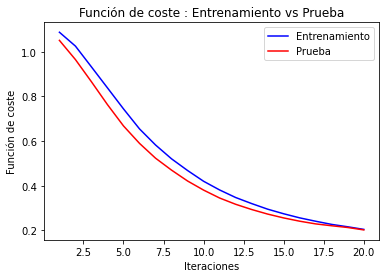

In [17]:
#Utilizaremos la variable History_1 donde guardamos los resultados del entrenamiento.
loss = History_1.history['loss']#En esta variable guardaremos los datos de la función de coste del conjunto de entrenamiento
val_loss = History_1.history['val_loss']#En esta variable guardaremos los datos de la función de coste del conjunto de prueba
epochs = range(1, len(loss) + 1)##En esta variable guardaremos el rango de las iteraciones
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Prueba')
plt.title('Función de coste : Entrenamiento vs Prueba')
plt.xlabel('Iteraciones')
plt.ylabel('Función de coste')
plt.legend()
plt.show()

### Gráfica del comportamiento de la exactitud (accurracy) de los resultados que se han generado durante el entrenamiento con los conjunto de datos de train y test (validación).

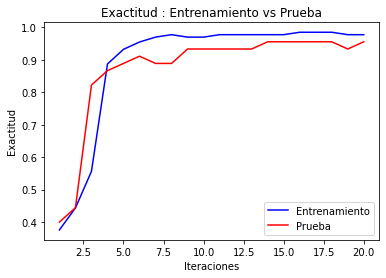

In [18]:
#Utilizaremos la variable History_1 donde guardamos los resultados del entrenamiento.
plt.clf()
acc = History_1.history['accuracy']#En esta variable guardaremos los datos de la exactitud del conjunto de entrenamiento
val_acc = History_1.history['val_accuracy']#En esta variable guardaremos los datos de la exactitud del conjunto de prueba
epochs = range(1, len(loss) + 1)##En esta variable guardaremos el rango de las iteraciones
plt.plot(epochs, acc, 'b', label='Entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Prueba')
plt.title('Exactitud : Entrenamiento vs Prueba')
plt.xlabel('Iteraciones')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

### De los resultados obtenidos con la primera red neuronal podemos inferir los siguiente:
 * #### El modelo alcanza una exactitud del 95% con los datos de prueba.
 * #### De la gráfica de función de coste observamos que los datos de prueba y entrenamiento se comportan de manera similar a medida que van aumentando las iteraciones la función disminuye esto quiere decir que el modelo es bueno y no hay sobreajuste.
 * #### Esto ultimo lo corroboramos con el gráfico de exactitud que tambien son similares y los dos van en alza.

# <center> Pasaremos generar la segunda arquitectura de nuestra red neuronal.

### Primero crearemos nuestro modelo el cual tendra un contenedor vacio para luego ir agregando las capas que estimemos pertinente.

In [19]:
#Ahora crearemos el modelo con un contenedor vacio para posteriormente ir agregando capas.
clasificador_2 = Sequential()

### El siguiente paso es agregar las capas a nuestro modelo.

In [20]:
#Pasaremos a agregar la primera capa oculta de 54 neuronas conectada densamente y utilizaremos 
#la función tangente hiperbólica (tanh) de activación la cual entrega valores de salida de -1 a 1.
clasificador_2.add(Dense(units = 54, activation = 'tanh'))
#-------------------------------------------------------------------------------------------------
#Agregaremos otra capa de salida oculta de 3 neuronas conectada densamente y aqui utilizaremos la 
#función de activación softmax para calcular la probabilidad de cada clase requerida para clasificación
#de multiclase.
clasificador_2.add(Dense(units = 3, activation = 'softmax'))

### Lo siguiente es compilar el modelo y parametrizarlo, aqui utilizarelmos el optimizador creado anteriormente.

In [21]:
#Compilaremos el modelo con los siguientes parámetros.
clasificador_2.compile(#Definiremos la función de coste para determinar el error entre el valor estimado y el valor real
                     #para esto utilizaremos el parámetro de entropía cruzada categórica
                     loss = 'categorical_crossentropy',
                     #Aca especificaremos el optimizador de gradiente descendente a utilizar para el entrenamiento
                     optimizer = Optimizador,
                     #Finalmente definimos la métrica de desempeño del modelo
                     metrics = ['accuracy'])

### Pasaremos a entrenar el modelo con 20 iteraciones y además le indicaremos cuál es nuestro conjunto de validación.

In [22]:
#Guardaremos en una variable los resultados del entrenamiento para posteriormente poder gráficar la perdida
#vs las iteraciones.
History_2 = clasificador_2.fit(#Aqui definimos nuestras datos de entrenamiento
                             X_train, y_train,
                             #Aca especificaremos la cantidad de iteraciones 
                             epochs = 20,
                             #Finalmente definimos nuestro conjunto de validación
                             validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 1s 47ms/step - loss: 1.0152 - accuracy: 0.5113 - val_loss: 0.7347 - val_accuracy: 0.8000
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 0.6135 - accuracy: 0.8195 - val_loss: 0.3781 - val_accuracy: 0.9556
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3428 - accuracy: 0.9323 - val_loss: 0.2226 - val_accuracy: 0.9778
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.2175 - accuracy: 0.9549 - val_loss: 0.1553 - val_accuracy: 0.9778
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1537 - accuracy: 0.9774 - val_loss: 0.1199 - val_accuracy: 0.9778
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1178 - accuracy: 0.9774 - val_loss: 0.0981 - val_accuracy: 0.9778
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0976 - accuracy: 0.9850 - val_loss: 0.0848 - val_accuracy: 1.0000
Epoch 8/20
5/5 [============

### Finalmente pasaremos a  probar el modelo contra el conjunto de test y obtener la exactitud.

In [23]:
#Calcularemos la exactitud del modelo con los datos de prueba
test_loss_2, test_accuracy_2 = clasificador_2.evaluate(X_test, 
                                                 y_test)
#-------------------------------------------------------------------------------------------------
#Imprimiremos la métrica para saber que tan exacto predijo nuestro modelo
print(test_accuracy_2)

2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 1.0000
1.0


### Gráfica con la función de coste de los resultados que se han generado durante el entrenamiento con los conjunto de datos de train y test (validación).

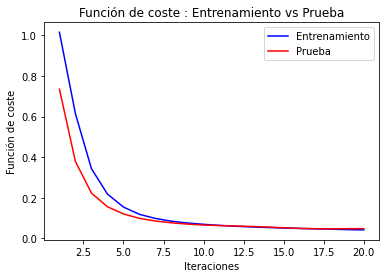

In [24]:
#Utilizaremos la variable History_1 donde guardamos los resultados del entrenamiento.
loss = History_2.history['loss']#En esta variable guardaremos los datos de la función de coste del conjunto de entrenamiento
val_loss = History_2.history['val_loss']#En esta variable guardaremos los datos de la función de coste del conjunto de prueba
epochs = range(1, len(loss) + 1)##En esta variable guardaremos el rango de las iteraciones
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Prueba')
plt.title('Función de coste : Entrenamiento vs Prueba')
plt.xlabel('Iteraciones')
plt.ylabel('Función de coste')
plt.legend()
plt.show()

### Gráfica del comportamiento de la exactitud (accurracy) de los resultados que se han generado durante el entrenamiento con los conjunto de datos de train y test (validación).

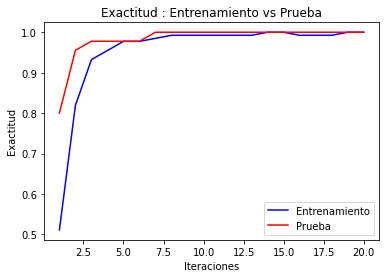

In [25]:
#Utilizaremos la variable History_1 donde guardamos los resultados del entrenamiento.
plt.clf()
acc = History_2.history['accuracy']#En esta variable guardaremos los datos de la exactitud del conjunto de entrenamiento
val_acc = History_2.history['val_accuracy']#En esta variable guardaremos los datos de la exactitud del conjunto de prueba
epochs = range(1, len(loss) + 1)##En esta variable guardaremos el rango de las iteraciones
plt.plot(epochs, acc, 'b', label='Entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Prueba')
plt.title('Exactitud : Entrenamiento vs Prueba')
plt.xlabel('Iteraciones')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

### De los resultados obtenidos con la segunda red neuronal podemos inferir los siguiente:
 * #### El modelo alcanza una exactitud del 100% con los datos de prueba.
 * #### De la gráfica de función de coste observamos que los datos de prueba y entrenamiento se comportan de manera similar a medida que van aumentando las iteraciones la función disminuye esto quiere decir que el modelo es bueno y no hay sobreajuste.
 * #### Esto ultimo lo corroboramos con el gráfico de exactitud que tambien son similares y los dos van en alza.
 #  Este segundo modelo logra la mejor clasificación.